In [100]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.shape

(5572, 5)

# DATA CLEANING

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [102]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [103]:
df.rename(columns={'v1':'target','v2':'text'},inplace = True)


In [104]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['target']= encode.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [105]:
df.isnull().sum()

,0
target,0
text,0


In [106]:
df.duplicated().sum()

np.int64(403)

In [107]:
df = df.drop_duplicates(keep = 'first')

In [108]:
df.shape

(5169, 2)

# EXPLORATORY DATA ANALYSIS

In [109]:
df['target'].value_counts()

,count
target,
0,4516
1,653


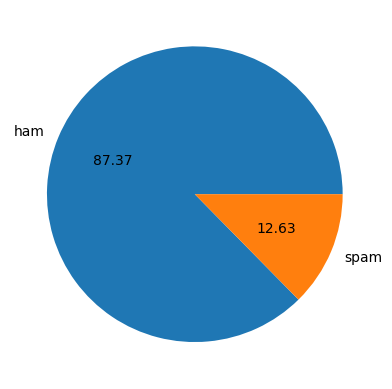

In [110]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [111]:
import nltk
import os

# Create a directory in your home folder for NLTK data
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')

# Check if the directory exists, and create it if not
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Now, set the NLTK data path
nltk.data.path.append(nltk_data_dir)

# Download the 'punkt' resource to this directory
nltk.download('punkt', download_dir=nltk_data_dir)

# Your original code should now work
# df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
df['num_char'] = df['text'].apply(len)

/tmp/ipython-input-3778023891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [113]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [114]:
df['word_count'] = df['text'].str.split(' ').str.len()

/tmp/ipython-input-2074300411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].str.split(' ').str.len()


In [115]:
df

,target,text,num_char,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [116]:
df[['num_char','word_count']].describe()

,num_char,word_count
count,5169.000000,5169.000000
mean,78.977945,15.455988
std,58.236293,11.163853
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [117]:
# Not Spam
df[df['target']==0][['num_char','word_count']].describe()

,num_char,word_count
count,4516.000000,4516.000000
mean,70.459256,14.259743
std,56.358207,11.231781
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,19.000000
max,910.000000,171.000000


In [118]:
#Spam
df[df['target']==1][['num_char','word_count']].describe()

,num_char,word_count
count,653.000000,653.000000
mean,137.891271,23.728943
std,30.137753,5.985799
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


<Axes: xlabel='num_char', ylabel='Count'>

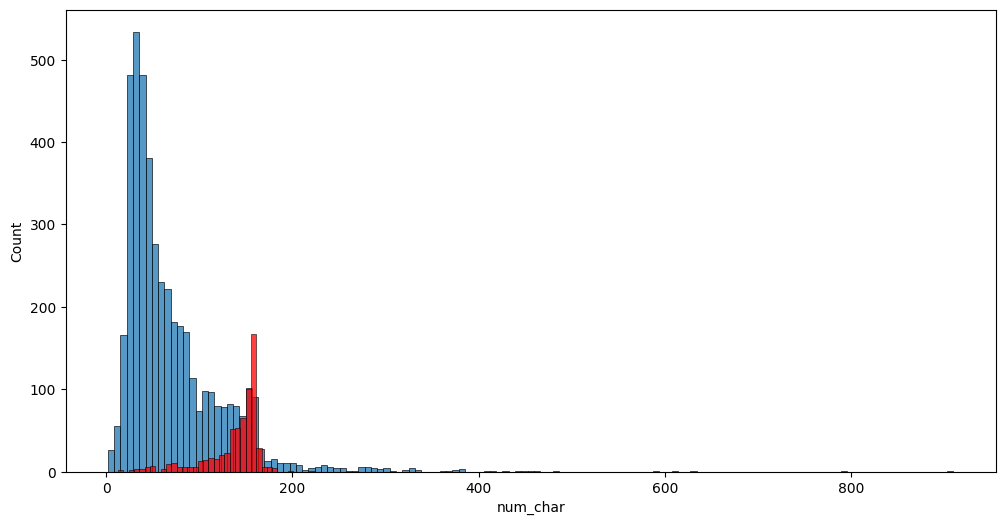

In [119]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color ='red')

<Axes: xlabel='word_count', ylabel='Count'>

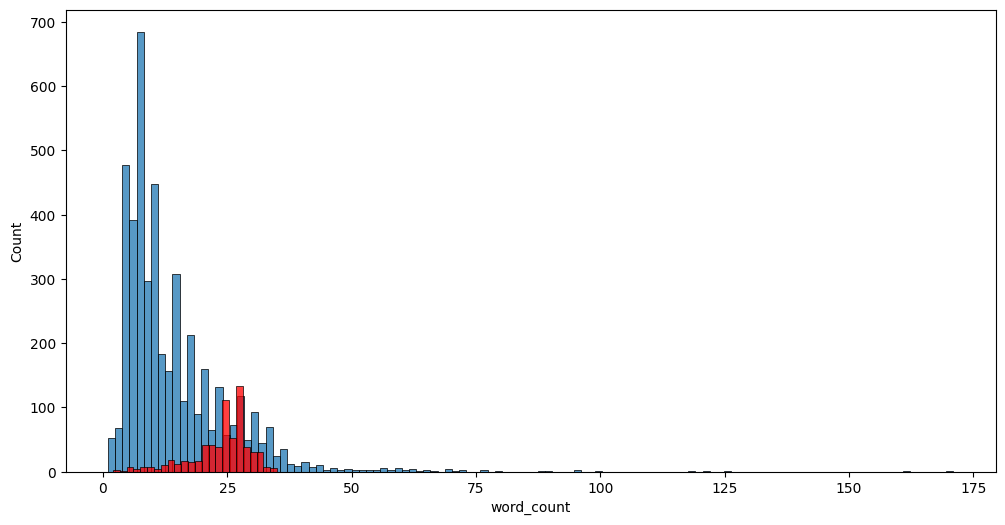

In [120]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['word_count'])
sns.histplot(df[df['target']==1]['word_count'],color ='red')

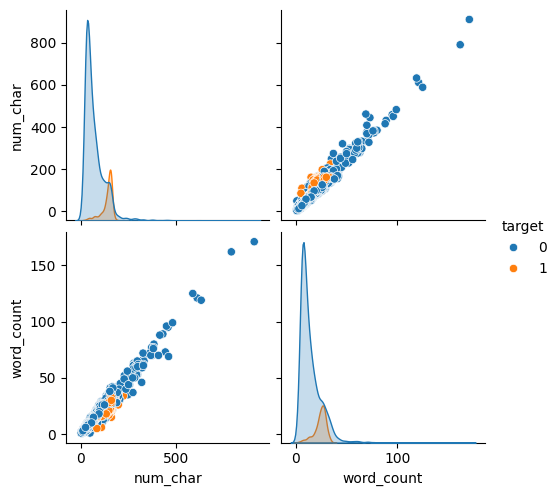

In [121]:
sns.pairplot(df,hue='target')

In [122]:
num = df.drop(columns = 'text')
num.corr()

,target,num_char,word_count
target,1.000000,0.384717,0.281818
num_char,0.384717,1.000000,0.974219
word_count,0.281818,0.974219,1.000000


<Axes: >

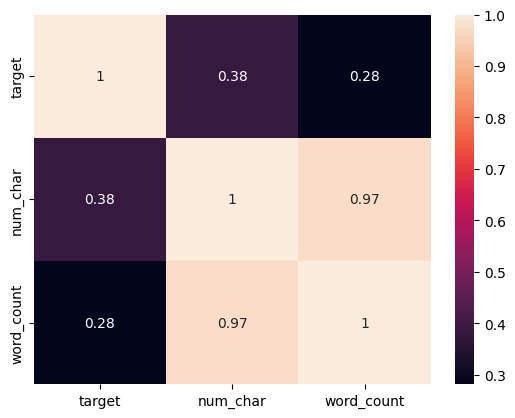

In [123]:
sns.heatmap(num.corr(),annot = True)
# Too reduce multi colinearity, we would take only

# Data Processing


*   Lower Case
*   Tokenization
*   Removing Special characters
*   Removing Stop words and punctuation
*   Stemming










In [124]:
english_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']


In [130]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Using scikit-learn's stopwords as NLTK is causing issues
english_stopwords = set(ENGLISH_STOP_WORDS)

def transform_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Tokenize using a regular expression
    tokens = re.findall(r'\b\w+\b', text)

    # 3. Filter out stopwords and punctuation
    # Use a list comprehension for a cleaner and more efficient approach
    filtered_tokens = [
        word for word in tokens
        if word not in english_stopwords and word not in string.punctuation
    ]

    return filtered_tokens



['good', 'example', 'includes', 'punctuation', 'stopwords', 'like']


In [134]:
!pip install stemming

  Preparing metadata (setup.py) ... done
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11123 sha256=c68c35c0756f149974a1d5d9c83b06131e51d3a9e3f3d60537f2600263fa3d03
  Stored in directory: /root/.cache/pip/wheels/20/d4/73/028ca44cd75949ad81250dd3ecea7e4c61b97672587b65ef35
Successfully built stemming


In [135]:
import re
import string
from stemming.porter2 import stem
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Using scikit-learn's stopwords as NLTK is causing issues
english_stopwords = set(ENGLISH_STOP_WORDS)

def transform_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Tokenize using a regular expression
    tokens = re.findall(r'\b\w+\b', text)

    # 3. Filter out stopwords and punctuation and then apply stemming
    stemmed_tokens = [
        stem(word) for word in tokens
        if word not in english_stopwords and word not in string.punctuation
    ]

    return stemmed_tokens


['good', 'exampl', 'includ', 'punctuat', 'stopword', 'like']


In [137]:
df['transformed_text']=df['text'].apply(transform_text)

/tmp/ipython-input-4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [138]:
df

,target,text,num_char,word_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,"[jurong, point, crazi, avail, bugi, n, great, ..."
1,0,Ok lar... Joking wif u oni...,29,6,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,11,"[u, dun, say, earli, hor, u, c, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,"[nah, don, t, think, goe, usf, live]"
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,"[2nd, time, tri, 2, contact, u, u, won, å, 750..."
5568,0,Will Ì_ b going to esplanade fr home?,37,8,"[ì_, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,26,"[guy, did, bitch, act, like, d, interest, buy,..."


In [142]:
import pandas as pd
from wordcloud import WordCloud

# Assuming df is your DataFrame and it has a 'transformed_text' column
# where each entry is a list of words.

# Convert the list of words in each row back into a single string.
# We'll use a space to join the words.
df['transformed_text_str'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Now, generate the word cloud using the new, consistent column.
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(
    df[df['target'] == 1]['transformed_text_str'].str.cat(sep=" ")
)

# You can now plot the word cloud
# For example, using matplotlib:
# import matplotlib.pyplot as plt
# plt.imshow(spam_wc)
# plt.show()

/tmp/ipython-input-2428863814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text_str'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')


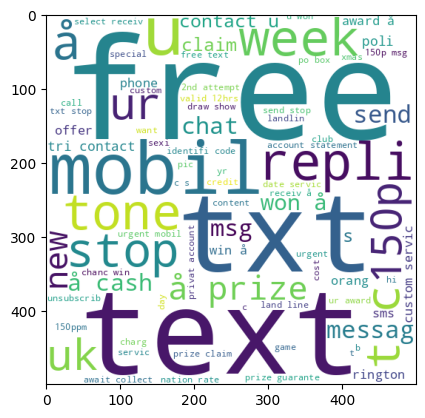

In [143]:
plt.imshow(spam_wc)

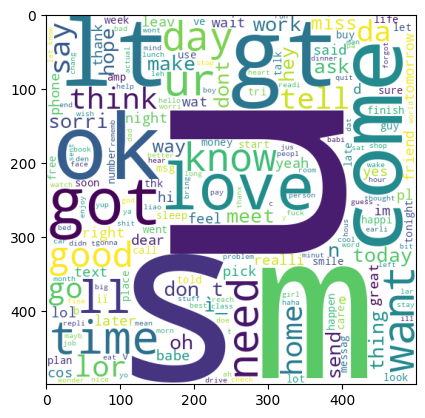

In [145]:
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(
    df[df['target'] == 0]['transformed_text_str'].str.cat(sep=" ")
)
plt.imshow(ham_wc)

In [152]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)


In [153]:
len(spam_corpus)

11402

In [160]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,å,247
1,free,195
2,2,184
3,u,147
4,txt,134
5,text,128
6,ur,119
7,mobil,118
8,4,114
9,stop,109


In [162]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)


In [163]:
len(ham_corpus)

34954

# Model Building

In [164]:
# Naive Bayes - Best Algorithm for Textual Data
# Text to Vector Conversion to be made
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [167]:
X = cv.fit_transform(df['transformed_text_str']).toarray()

In [170]:
X.shape

(5169, 7113)

In [171]:
y = df['target'].values

In [172]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [175]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[786 110]
 [ 14 124]]
0.5299145299145299


In [178]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

In [179]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[881  15]
 [  9 129]]
0.8958333333333334


In [180]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

In [181]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[894   2]
 [ 21 117]]
0.9831932773109243
